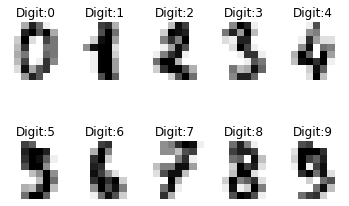

In [2]:
%matplotlib inline
#画像分類器
import matplotlib.pyplot as plt
from sklearn import datasets

#digitsデータのロード（数字データの画像ファイル）
digits = datasets.load_digits()

#画像の表示
for label,img in zip(digits.target[:10],digits.images[:10]):
    plt.subplot(2,5,label+1)
    plt.axis("off")
    plt.imshow(img,cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title("Digit:{0}".format(label))
    
plt.show()

0~9の手書き文字データの表示（まだ分類器ではない）


In [10]:
%matplotlib inline

import numpy as np
from sklearn import datasets,tree,metrics

digits = datasets.load_digits()

#3,8のデータ位置を求める
flag_3_8 = (digits.target == 3) + (digits.target == 8)

#3,8のデータの取得
images = digits.images[flag_3_8]
labels = digits.target[flag_3_8]

images = images.reshape(images.shape[0],-1)

#分類器の生成
n_samples = len(flag_3_8[flag_3_8])
train_size = int(n_samples * 3/5)
classifier = tree.DecisionTreeClassifier()
classifier.fit(images[:train_size],labels[:train_size])

expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])

print("Accuracy:\n",metrics.accuracy_score(expected,predicted))
print("\nConfusion matrics:\n",metrics.confusion_matrix(expected,predicted))
print("\nPrecision:\n",metrics.precision_score(expected,predicted,pos_label=3))
print("\nRecall:\n",metrics.recall_score(expected,predicted,pos_label=3))
print("\nF-measure:\n",metrics.f1_score(expected,predicted,pos_label=3))



Accuracy:
 0.8461538461538461

Confusion matrics:
 [[60 15]
 [ 7 61]]

Precision:
 0.8955223880597015

Recall:
 0.8

F-measure:
 0.8450704225352113


### プログラムの内容
実際の分類器．Accuracy(正答率)は0.867..である．
train_size = int(n_samples * 3/5)から，教師データをサンプルデータの60%としている．
（サンプルデータ->学習データ（60%）＋テストデータ（40%）
数値を変えれば結果も変化する．
学習データとテストデータの分類は大切，学習データでのテスト->__過学習__

### 過学習
学習データの分布に偏りがある場合，それを含めた学習をしてしまう．つまり，汎用性が落ちる．

ex.)身長の男女比の学習->日本人のデータのみでの学習では，アメリカ人のデータに適応できない

### 学習法
__決定木__ の使用．
-決定木：データの分類法，樹木のようにデータを分岐させる．ex.)丸い/四角い->赤い/黄色　といった4分岐で果物を分類
欠点：過学習しやすい，適応させづらい場合がある

生成方：scikit-learnの利用，コードは  `classifier = tree.DecisionTreeClassifier(max_depth=3)`

(from sklearn import treeで使用)

-max_depth で決定木の最大深さを設定．（分類の深さ，exではmax_depth=2）

木のモデルにも種類があり，defaultでは __CART__ という方法．引数 `criterion="entropy` の指定で __C4.5__ .

### 性能の評価法
出来上がった分類器の性能評価を行う．性能評価のパラメータとして，次の4種を設定．

なお．分類器は入力データに対してPositive/Negativeのどちらかを返すものとする．

ex.)病気の判定->陽性ならPositive，陰性ならNegative
- True-positive
- False-positive
- True-Negative
- False-Negative

True/Falseで分類の成功/失敗，Positive/Negativeは分類の種類．

ex.)True-Positiveなら陽性の判定かつその判定が当たっている（病気）False-Negativeなら陰性という判定が間違っている（病気）．状態としてはTrue-Positive == False-Negative

以上のパラメータから，次の3つのパラメータを算出できる
__Accuracy(正答率）= (TP+TN)/(TP+FP+FN+TN)
Precision(適合率）= (TP)/(TP+FP)
Recall(再現率）=(TP)/(TP+FN)__

さらに，よく用いられる指標として __F値__ が存在する

__F-measure(F値) = (2Precision×Recall)/(Precision + Recall)__
->適合率と再現率の調和平均

#### Accuracy
全体の事象の中で，どれだけ __判定に成功__ したか．一つの分類器に一つ存在．

コード：`metrics.accuracy_score()` 

#### Precision
分類器がPositive(Negative)と予想した中で，真にPositive(Negative)なものの比率．
ある __分類自体の成功率__ ．したがって，分類数だけ存在する値である．

コード：`metrics.precision_score()`

#### Recall
真にPositiveなものに対して，分類器がPositiveであると予想できた比率を示した値．
ex.)TP==FNであると示したが，FNの場合，病気なのに判定されていない，という状況にある．
（NegativeのRecallはこの比率．）

コード：`metrics.recall_score()`

#### F-measure
適合率と再現率の調和平均．この二つの指標を総合的に判断するときに用いる．

コード：`metrics.fl_score()`

#### confusion matrix
混同行列．予測/実際の真偽で分類された表．すなわち，TP,FP,TN,FNをしめす表．

コード：`metrics.confusion_matrics()`

### 実際の評価との関連
-Accuracy=0.86:非常に高い...というわけではない．より正確なものが求められるのではないか

-confusion matrixから見る分類の傾向：
表の見方は，[[3,8],[3,8]]つまり，[0,0]が実際に3で判定も3，[1,1]が実際に8で判定も8
したがって，3よりも8のほうが高く判定できる．
precision/recallは３の場合の値．


## 評価の注意点
今回の分類器は，8は比較的高く判定できるが，(recall-8 = 61/68=0.897)3はさして高くない(recall-3 = 60/75=0.8)．
ただし予測の正答率は8よりも(precision-8 = 0.80)３のほうが高い(precision-3 = 0.89).
このように，precisionとrecallは反比例の関係にある．
分類器の評価において重要なのは，分類の目的である． __誤検出を防ぐ__ ことが求められるなら，見落とし(False-Positive)が多少多くなっても確実にPositiveなものを選択する必要がある．したがって，再現率よりも __適合率__ が求められる．
逆にコストパフォーマンスを重視して __見落としを減らす__ のならば，多少の誤検知(False-Positive)が多くなってもPositiveと判定したものを多く回収する必要がある．すなわち適合率よりも __再現率__ ．
課題によって，どのようなパラメータが重視されるのか，よく見極めなければならない．総合的な評価をしたい場合は，F値を参考にするとよい．

ex.)例に出した，病気の判定について考える．
仮にこの病気が重大なものであった場合，減らすべきはFalse-Negativeだ．"病気かもしれないが違った"よりも"病気じゃなかったけど実は病気だった"が最もよくないのである．したがって， __False-Negativeの最小化__ が求められる．
反対に，症状が出ているが本当にその重篤な病気なのかわからない，という場合は， __False-Positiveの最小化__ が求められる．
"実際はそうじゃないのに，強い副作用を持つ薬を使用してしまった"という場合を避けるためだ．
FP/FNはトレードオフの関係にあるが，どの場合に，どの判定法を用いるか，というのが非常に重要である．

[参考](https://quita.com/steel_code/items/101c9d037d5e8c2b7876)